<h1>Investigate a Dataset Project</h1>

<h3>
Dataset : Titanic data <br>
File name: titanic_data.csv <br>
Python Modules used in the analysis: Pandas for data analysis, matplotlib for visualizations </h3>


Questions about titanic dataset:<br>

1. What is the average ticket fare summary for each passenger class boarded on different locations?

2. How many passengers embarked at each location for each passenger class?

3. What proportion of male and female passengers survived from the given dataset?

4. Summarize number of survivors from each passenger class.

5. Give a comparison of number of people survived against total number of people in each class.


In [63]:
### To investigate titanic dataset
#Import necessary modules for data analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
###Load data from titanic_data.csv file into python dataframe

titanic_raw_data = pd.read_csv('C:/Users/Pavan/Desktop/P2/Titanic/titanic_data.csv')
titanic_raw_data.head()       #Retrieves top five rows of the titanic dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
### Identify columns with missing values
NaN_columns = []
for search_for_NaN in titanic_raw_data.columns:
    if titanic_raw_data[search_for_NaN].isnull().values.any():
        NaN_columns.append(search_for_NaN)
NaN_columns

['Age', 'Cabin', 'Embarked']

<b>It is observed that age, cabin and embarked station columns contain NaN or missing values. We replace the NaN values with zeros for our analysis. </b>

In [66]:
### Replace the NaN values with 0s
titanic_data = titanic_raw_data.fillna(0)

# Check for any suprising data points in the variables
missing_embarked_data  = titanic_data[titanic_data['Embarked']==0]
missing_embarked_data             #the data consists of two passengers ids with same ticket number

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,0


<b>In the above data rows, the details on place of embarkation is missing. Further more, the two passenger ids have the same ticket number. This is surprising! </b>

In [67]:
### Let us look at the ticket fare details of the passengers
passenger_fare_details = titanic_data['Fare']
passenger_fare_details.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<b>The maximum fare collected from the passenger is 512.32 Euros. However, the data suggests the minimum fare is zero. Let us look at the details of passengers where fare is zero. Are these crew members? Let us find out. </b>

In [68]:
### Retrieve passenger details where fare is zero

zero_fare_passengers = titanic_data[titanic_data['Fare']== 0]
print len(zero_fare_passengers)
zero_fare_passengers

15


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0.0,0,0,239853,0.0,0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,0.0,0,0,239853,0.0,0,S
466,467,0,2,"Campbell, Mr. William",male,0.0,0,0,239853,0.0,0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,0.0,0,0,239854,0.0,0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,0.0,0,0,112052,0.0,0,S


<b>There are fiftheen passengers with ticket fare as zero. These passenger details suggest they may not be crew members because, each passenger has a passenger id and they boarded in different passenger classes. </b>

In [69]:
### Let us look at the break up of average passengers fare in each class from different stations

titanic_data.groupby(['Pclass','Embarked']).mean()['Fare']

Pclass  Embarked
1       0            80.000000
        C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

<b>In the above passenger fare summary, we notice that in passenger class - one, there is a new data point with missing boarding location (which was replace with zeros). Let us delete the rows where passenger boarding location data is not available. Also, lets us remove the rows where ticket fare is not provided for the simplicity.</b>

In [70]:
###Exclude data rows where passenger fare is not available and passenger boarding data is not available.

revised_titanic_data = titanic_data[(titanic_data['Fare']!=0) & titanic_data['Embarked']!=0]
len(revised_titanic_data)

874

In [71]:
### Question 1: Summarize passengers' average ticket fare for each passenger class boarded on different locations

revised_titanic_data.groupby(['Pclass','Embarked']).mean()['Fare']

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            73.248668
2       C            25.358335
        Q            12.350000
        S            21.099367
3       C            11.214083
        Q            11.183393
        S            14.811923
Name: Fare, dtype: float64

In [72]:
###Question 2: Summarize how many passengers embarked at each location for each passenger class

revised_titanic_data.groupby(['Pclass','Embarked']).count()['PassengerId']

Pclass  Embarked
1       C            85
        Q             2
        S           122
2       C            17
        Q             3
        S           158
3       C            66
        Q            72
        S           349
Name: PassengerId, dtype: int64

For the break up of passenger boarding at each location, we observe that majority of the passengers boarded the ship at Southampton (629) and very few passengers (75) boarded from Queenstown.

In [73]:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [74]:
### Question 3: What proportion of male and female passengers survived from the given dataset

def passenger_count(gender):
    total_passengers = len(revised_titanic_data[revised_titanic_data['Sex']==gender])
    return total_passengers


def passengers_survival(gender):
    survival_count = len(revised_titanic_data[(revised_titanic_data['Sex']== gender) & (revised_titanic_data['Survived']==1)])
    total_passenger_count = passenger_count(gender)
    survival_proportion = float(survival_count)/float(total_passenger_count)
    return survival_proportion

print "Female Passenger Survival proportion:"+ str(passengers_survival('female'))
print "Male Passenger Survival proportion:"+ str(passengers_survival('male'))


Female Passenger Survival proportion:0.740384615385
Male Passenger Survival proportion:0.192170818505


<b>The male and female survival data suggests that female passengers were rescued first, and evacuated them in to the safety boats. </b>

In [75]:
### Question 4: Summarize number of survivors from each passenger class

survived_passengers = titanic_raw_data[titanic_raw_data['Survived'] == 1]

print survived_passengers.groupby(['Pclass']).count()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [76]:
### Question 5: Give a comparison of number of people survived against total number of people in each class

def passengers_in_class(passenger_class):
    passengers = titanic_raw_data[titanic_raw_data['Pclass']== passenger_class]
    return len(passengers)

def passengers_survived(passenger_class):
    survived_passengers = titanic_raw_data[(titanic_raw_data['Survived']== 1)  & (titanic_raw_data['Pclass']== passenger_class)]
    return len(survived_passengers)

print str(passengers_survived(1)) + " survived out of "+str(passengers_in_class(1))+" in passenger class one"
print str(passengers_survived(2)) + " survived out of "+str(passengers_in_class(2))+" in passenger class two"
print str(passengers_survived(3)) + " survived out of "+str(passengers_in_class(3))+" in passenger class three"

136 survived out of 216 in passenger class one
87 survived out of 184 in passenger class two
119 survived out of 491 in passenger class three


<b>In the above question, I used the titanic raw data for the analysis because we are looking at survived passengers in each passenger class. There are no missing values in these two columns. Hence, I used this raw data set. </b>

Populating the interactive namespace from numpy and matplotlib
count    705.000000
mean      29.587475
std       14.524925
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


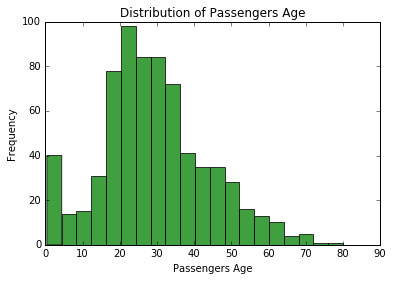

In [77]:
%pylab inline

remove_age_is_zero = revised_titanic_data[revised_titanic_data['Age']!= 0]   #Filter out data where age is missing
remove_age_is_zero
passengers_age = remove_age_is_zero['Age']

print passengers_age.describe()

age_distribution = plt.hist(passengers_age, bins = 20,facecolor='green', alpha=0.75)
plt.xlabel('Passengers Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passengers Age')

<b>Observations from Histogram:<br>

The histogram is right skewed with mean age of ~29 years and standard deviation of 14.5 years. 68 % of the passengers age falls between 14.5 and 43.5 years. </b>



In [78]:
len(remove_age_is_zero[remove_age_is_zero['Age']<= 4])   #number of passengers under the age four

40

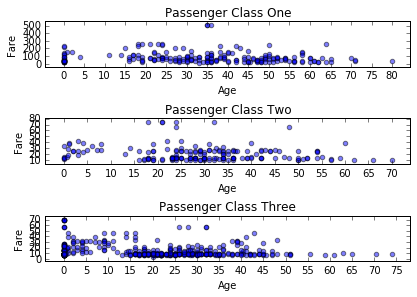

In [79]:
### Visualize the relationship between ticket fares and passengers' age in each passenger class
def get_age_and_fare_details(passenger_class):
    if passenger_class == 1:
        passengers = revised_titanic_data[revised_titanic_data['Pclass']==1]
    elif passenger_class ==2:
        passengers = revised_titanic_data[revised_titanic_data['Pclass']==2]
    elif passenger_class == 3:
        passengers = revised_titanic_data[revised_titanic_data['Pclass']==3]
    else:
        None
    return passengers['Fare'],passengers['Age']

class_one = 1
class_two = 2
class_three = 3

plt.figure(1)

plt.subplot(311)
plt.tight_layout()
passengers_fare, passengers_age = get_age_and_fare_details(class_one)
yticks = np.arange(0,700,100)
xticks = np.arange(0,81,5)
plt.yticks(yticks)
plt.xticks(xticks)
plt.title('Passenger Class One')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.scatter(passengers_age, passengers_fare,alpha=0.5)

plt.subplot(312)
plt.tight_layout()
passengers_fare, passengers_age = get_age_and_fare_details(class_two)
yticks = np.arange(0,100,10)
xticks = np.arange(0,81,5)
plt.yticks(yticks)
plt.xticks(xticks)
plt.title('Passenger Class Two')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.scatter(passengers_age, passengers_fare,alpha=0.5)

plt.subplot(313)
plt.tight_layout()
passengers_fare, passengers_age = get_age_and_fare_details(class_three)
yticks = np.arange(0,100,10)
xticks = np.arange(0,81,5)
plt.yticks(yticks)
plt.xticks(xticks)
plt.title('Passenger Class Three')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.scatter(passengers_age, passengers_fare,alpha=0.5)
plt.show()

Observations:

1. There are many passengers against which ticket fare was not captured. Hence in the scatter plot there are many data points between zero and ten, especially in passenger class three.  

2. In passenger class one, three people aged around 35, paid around 500 euros for class one ticket.

3. The maximum fares for class two and class three passengers are around 80 and 70 respectively. 


In [80]:
# Passengers who paid more than 500 Euros for the trip
revised_titanic_data[revised_titanic_data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,0,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<b>Observations:

1. All the three passengers have the same ticket number.<br>
2. The cabin information for passenger id 259 is missing, and three cabin numbers are allotted to passenger id 680. There must be an error in recording the passenger data. </b>